In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sn
import datetime


In [2]:
def Spending(All,Category,idens,debug=False,write=True):
    ico=[]
    shp=np.shape(All)
    ilength = shp[0]
    maxindx = np.max( All.index )
    #print(maxindx,ilength)
    #for idx in np.arange():
    for idx in All.index:
        if (  any(item in str(aaa['Memo'][idx]).upper() for item in idens)):
            if( debug==True):
                print(aaa['Memo'][idx],aaa['Amount Debit'][idx])
            ico.append(idx)
            
    globals()[Category] = All.loc[ico] 
    print(Category+" ====>", np.sum(globals()[Category]['Amount Debit']))
    if (write==True):
        CatFile='/Users/juliob/Desktop/grocer/' +Category+'.csv'
        globals()[Category].to_csv(CatFile)
        


In [3]:
""" 
Pandas here is a bit like Xarray, i.e., it let's us read in data
and maninipulte it aithe statements like data['XYZ'] etc.
"""

file='/Users/juliob/Desktop/grocer/AllFromDec2021.csv'
aaa=pd.read_csv(file,skiprows=[0,1,2] )



In [4]:
#shp_aaa=np.shape(aaa)
#ilength = shp_aaa[0]

In [5]:
idens=("TRANSFER TO LOAN",)
Category="ToHELOC"
Spending(All=aaa,Category=Category,idens=idens)

ToHELOC ====> -26762.0


In [6]:
idens=("FROM LOAN",)
Category="FromHELOC"
Spending(All=aaa,Category=Category,idens=idens)
print("From HELOC 2 <==", np.sum(FromHELOC['Amount Credit']))

FromHELOC ====> 0.0
From HELOC 2 <== 72810.0


In [7]:
#Codes for fast-food, restaruarnts and brew pubs
restoran=("5812 %%","5813 %%","5814 %%","Long s Peak Pub".upper(),)
Category="EatingOut"
Spending(All=aaa,Category=Category,idens=restoran)

EatingOut ====> -21715.23


In [8]:
#Codes "
restoran=("5399 %%", "5411 %%", "5422 %%",  "5462 %%",  "5499 %%",
          "WHOLEFDS","SOOPERS","SPROUTS","SAFEWAY", "LONGMONT DAIRY",
          "SAMSCLUB","SAM'S Club".upper(),"TARGET","NATURAL GROCER",
          "CHEESE IMPORTER",)

Category="Groceries"
Spending(All=aaa,Category=Category,idens=restoran)

Groceries ====> -26264.09


In [9]:
#Codes "
restoran=("CITY OF LONGMONT","XCEL","SPRINT","LIVELY")
Category="PhoneUtilities"
Spending(All=aaa,Category=Category,idens=restoran,write=True)

PhoneUtilities ====> -9246.289999999999


In [10]:
#Codes for Kids
restoran=("LUCAS","JOHN","EVA ","CLARA",
          )
Category="Kiddies"
Spending(All=aaa,Category=Category,idens=restoran)

#reset counter
#So here we see function could need an "exclude" option

Kiddies ====> -22107.0


In [11]:

#Codes for liquor stores"
restoran=("5921 %%","LIQUOR")
Category="Liquor"
Spending(All=aaa,Category=Category,idens=restoran)

Liquor ====> -2557.5500000000006


In [12]:
common_list = set(Groceries.index).intersection(EatingOut.index)
AccountedForSet=set(Groceries.index).union(EatingOut.index,Liquor.index,Kiddies.index,
                    ToHELOC.index,PhoneUtilities.index)
UnAccountedForSet=set(aaa.index).difference(AccountedForSet)

# returns items present only in set A
# print(A.difference(B)) 

UnAccountedForIdx=list(UnAccountedForSet)
AccountedForIdx=list(AccountedForSet)

UnAccountedFor=aaa.loc[UnAccountedForIdx]
AccountedFor=aaa.loc[AccountedForIdx]
print("Accounted for.    ===>",np.sum(AccountedFor['Amount Debit']))
print("Still unaccounted ===>",np.sum(UnAccountedFor['Amount Debit']))

Accounted for.    ===> -108572.12
Still unaccounted ===> -164130.11


In [13]:
#Codes "
restoran=("PENNYMAC",)
Category="PennyMac"
Spending(All=aaa,Category=Category,idens=restoran)

PennyMac ====> -31720.780000000006


In [14]:
#Codes "
restoran=("TIAA-CREF","BEST BUY","PAYOFF","NASA FCU","APPLECARD","SALLIE MAE")
Category="OtherFixed"
Spending(All=aaa,Category=Category,idens=restoran)

OtherFixed ====> -17462.96


In [15]:
#Codes "
restoran=("GEICO",)
Category="GEICO"
Spending(All=aaa,Category=Category,idens=restoran)

GEICO ====> -6601.12


In [16]:
#Codes "
restoran=("5511 %%", "5521 %%","5532 %%","5533 %%","CIRCLE K","5541 %%","5542 %%",
          "SHELL SERVICE","MOTOR VEHICLE","FOWLER OF LONGMONT","BOWEN STREET GARAGE",)
Category="CarsFuel"
Spending(All=aaa,Category=Category,idens=restoran,write=True)

CarsFuel ====> -5643.320000000001


In [17]:
#Codes "
restoran=("GUARDIAN",)
Category="GuardianStorage"
Spending(All=aaa,Category=Category,idens=restoran)

GuardianStorage ====> -2422.85


In [18]:
#Codes "
restoran=("KAREN BRICKEN","BE CENTER",)
Category="KarenBricken"
Spending(All=aaa,Category=Category,idens=restoran)

KarenBricken ====> -6864.0


In [19]:
#Codes "
restoran=("HOME DEPOT","LOWE'S","ACE HARDWAR","SLADE GLASS","BED BATH","5992 %%",
          "5193 %%", "5261 %%","BIN THERE DUMP","SUMMIT TREE CARE","TEE GEE ROOTER",
          "BEDBATH",)
Category="HomeHardware"
Spending(All=aaa,Category=Category,idens=restoran)

HomeHardware ====> -5993.96


In [20]:
#Codes "
restoran=("MURDOCH","BROWNS SHOE","KOHLS","5931 %%","MACY'S","DICK'S",
          "DILLARDS","MARSHALLS","JOANN","THREAD","DSW","YARN",)
Category="Clothes"
Spending(All=aaa,Category=Category,idens=restoran)

Clothes ====> -4208.4


In [21]:
#Codes "
restoran=("OFFICE","STAPLES",)
Category="Office"
Spending(All=aaa,Category=Category,idens=restoran)

Office ====> -1408.84


In [22]:
#Codes "
restoran=("1313 A SALON","ULTA",)
Category="HairCare"
Spending(All=aaa,Category=Category,idens=restoran)

HairCare ====> -2924.74


In [23]:
#Codes "
restoran=("HOTEL","AIRBNB","5947 %%")
Category="Hotels"
Spending(All=aaa,Category=Category,idens=restoran)

Hotels ====> -5726.89


In [24]:
#Codes "
restoran=("FRONTIER","SPIRIT AIR","AIR CANADA","AMERICAN AIR",)
Category="Airlines"
Spending(All=aaa,Category=Category,idens=restoran)

Airlines ====> -2933.43


In [25]:
AccountedForSet=set(AccountedFor.index).union(PennyMac.index,OtherFixed.index,
                    GEICO.index,KarenBricken.index,GuardianStorage.index,
                    CarsFuel.index,HomeHardware.index,Clothes.index,Office.index,
                    HairCare.index,Hotels.index,Airlines.index)
UnAccountedForSet=set(aaa.index).difference(AccountedForSet)

# returns items present only in set A
# print(A.difference(B)) 

UnAccountedForIdx=list(UnAccountedForSet)
AccountedForIdx=list(AccountedForSet)

UnAccountedFor=aaa.loc[UnAccountedForIdx]
AccountedFor=aaa.loc[AccountedForIdx]
print("Accounted for.    ===>",np.sum(AccountedFor['Amount Debit']))
print("Still unaccounted ===>",np.sum(UnAccountedFor['Amount Debit']))

Accounted for.    ===> -201359.54
Still unaccounted ===> -71342.69


In [26]:
#Codes "
restoran=("AMZN","PRIME VIDEO","AMAZON","APPLE","ROKU","HBO","DISNEY","5818 %%",
         "NETFLIX","SPOTIFY",)
Category="Prime"
Spending(All=UnAccountedFor,Category=Category,idens=restoran,write=True)

Prime ====> -4401.24


In [27]:
#Codes "
restoran=("KUVO","ORNIT","WIKIMEDIA",)
Category="Donation"
Spending(All=UnAccountedFor,Category=Category,idens=restoran,write=True)

Donation ====> -920.3999999999999


In [28]:
#Codes "
restoran=("KAISER","WALGREEN","PHARM","8099 %%",)
Category="Pharma"
Spending(All=UnAccountedFor,Category=Category,idens=restoran,write=True)

Pharma ====> -1218.1799999999998


In [29]:
#Codes "
restoran=("WELLS FARGO BAN","GUITAR",)
Category="Guitar"
Spending(All=UnAccountedFor,Category=Category,idens=restoran,write=True)

Guitar ====> -1385.37


In [30]:
ResidSet=set(UnAccountedFor.index).difference(
         set(Prime.index).union(Donation.index,Pharma.index,Guitar.index))

#UnAccountedForIdx=list(UnAccountedForSet)
#UnAccountedFor=UnAccountedFor.loc[UnAccountedForIdx]
#UnAccountedFor.sort_values(by=['Amount Debit'],ascending=True,inplace=True)
#UnAccountedFor.to_csv('/Users/juliob/Desktop/grocer/UnAccounted.csv')

In [31]:
ResidIdx=list(ResidSet)
Resid=UnAccountedFor.loc[ResidIdx]
print("Residual.    ===>",np.sum(Resid['Amount Debit']))


Residual.    ===> -63417.5


In [32]:
#UnAccountedFor.sort_values(by=['Amount Debit'],ascending=True,inplace=True)
#UnAccountedFor.to_csv('/Users/juliob/Desktop/grocer/UnAccounted.csv')
Resid.sort_values(by=['Amount Debit'],ascending=True,inplace=True)
Resid.to_csv('/Users/juliob/Desktop/grocer/Residual.csv')
Prime.to_csv('/Users/juliob/Desktop/grocer/Prime.csv')


In [33]:
soo=-UnAccountedFor['Amount Debit']
print(len(soo))
soo=-Resid['Amount Debit']
print(len(soo))
#soo=-Prime['Amount Debit']
#print(len(soo))

1007
637


(10999,)
63309.75543231202


(0.0, 100000.0)

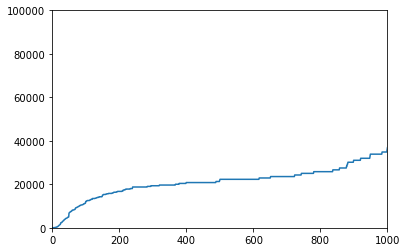

In [34]:
bnum=11000
bin=np.linspace(0,11000.,num=bnum)
abin=0.5*(bin[1:]+bin[0:bnum-1])
print(np.shape(abin))

hoo=np.histogram(soo,bins=bin)

print(np.sum(hoo[0]*abin))
ahoo=np.cumsum(hoo[0]*abin)
#print(hoo[1])
#plt.plot(abin,ahoo)
#plt.xlim(0,1000)
plt.plot(abin,ahoo)
plt.xlim(0,1000)
plt.ylim(0,100000.)

In [ ]:
#plt.plot( g['Amount Debit'])
print(np.sum( g1['Amount Debit'] )+ np.sum(g2['Amount Debit']) + np.sum(g3['Amount Debit']) 
      + np.sum(g4['Amount Debit'] ) )

In [ ]:
soo= -aaa['Amount Debit']
poo= aaa['Amount Credit']
aaa['Date']=pd.to_datetime( aaa['Date'] )
#plt.plot(soo)
print(np.sum(soo))
print(np.sum(poo))
aaa['Date'].dt.month[10]

dates = aaa['Date']

for imo in np.arange(11):
    month=imo+1
    zz=np.where(dates.dt.month==month)
    print(np.shape(zz))
    dates[zz[0][0]]
    bbb=aaa.iloc[zz[0]]
    x=np.sum(bbb['Amount Debit'])
    y=np.sum(bbb['Amount Credit'])
    print(  "month", month," debits=", f'{ x:.1f}', " credits=", f'{ y:.1f}' )

In [ ]:
gto=[g1,g2,g3,g4]

In [ ]:
roo=pd.concat( gto )

In [ ]:
file='/Users/juliob/Desktop/grocer/AllStores.csv'

In [ ]:
roo.to_csv(file)

In [ ]:
print((np.sum( g1['Amount Debit'] )+ np.sum(g2['Amount Debit']) + np.sum(g3['Amount Debit']) 
      + np.sum(g4['Amount Debit'] ) )/4.5)